In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/GANAnomalyDetection/count_reconstructed_error')

In [4]:
# load train and test set with results
lstm_train = pd.read_csv('/content/drive/MyDrive/GANAnomalyDetection/count_reconstructed_error/datasets/temperature_train_reconstructed.csv')
lstm_test = pd.read_csv('/content/drive/MyDrive/GANAnomalyDetection/count_reconstructed_error/datasets/temperature_test_reconstructed.csv')
transformer_train = pd.read_csv('/content/drive/MyDrive/GANAnomalyDetection/count_reconstructed_error/datasets/temperature_train_transformer_reconstructed.csv')
transformer_test = pd.read_csv('/content/drive/MyDrive/GANAnomalyDetection/count_reconstructed_error/datasets/temperature_test_transformer_reconstructed.csv')

In [9]:
def plot(dataframe, label):
  fig = plt.figure(figsize=(30, 6))
  ax = fig.add_subplot(111)
  x = np.arange(0, len(dataframe), 1)
  plt.plot(x, dataframe['reconstructed'], label='reconstructed')
  plt.plot(x, dataframe['signal'], label='original')


  plt.title(label, size=34)
  plt.ylabel('value', size=30)
  plt.xlabel('Time', size=30)
  plt.xticks(size=26)
  plt.yticks(size=26)
  plt.legend()
    
  plt.show()

In [13]:
def plot_error(dataframe, label):
  fig = plt.figure(figsize=(30, 6))
  ax = fig.add_subplot(111)
  x = np.arange(0, len(dataframe), 1)
  error = abs(dataframe['reconstructed'] - dataframe['signal'])
  plt.plot(x, error)
  plt.title(label, size=34)
  plt.ylabel('value', size=30)
  plt.xlabel('Time', size=30)
  plt.xticks(size=26)
  plt.yticks(size=26)
  plt.show() 
  return error

In [14]:
def count_statistics(error):
  print("Mean: ", np.mean(error))
  print("Std: ", np.std(error))
  print("Max: ", np.amax(error))
  print("Min: ", np.amin(error))

   reconstructed   timestamp    signal
0       0.795040  1386018900  0.675424
1       0.795132  1386019200  0.684525
2       0.795568  1386019500  0.695691
3       0.795730  1386019800  0.714638
4       0.796081  1386020100  0.725812


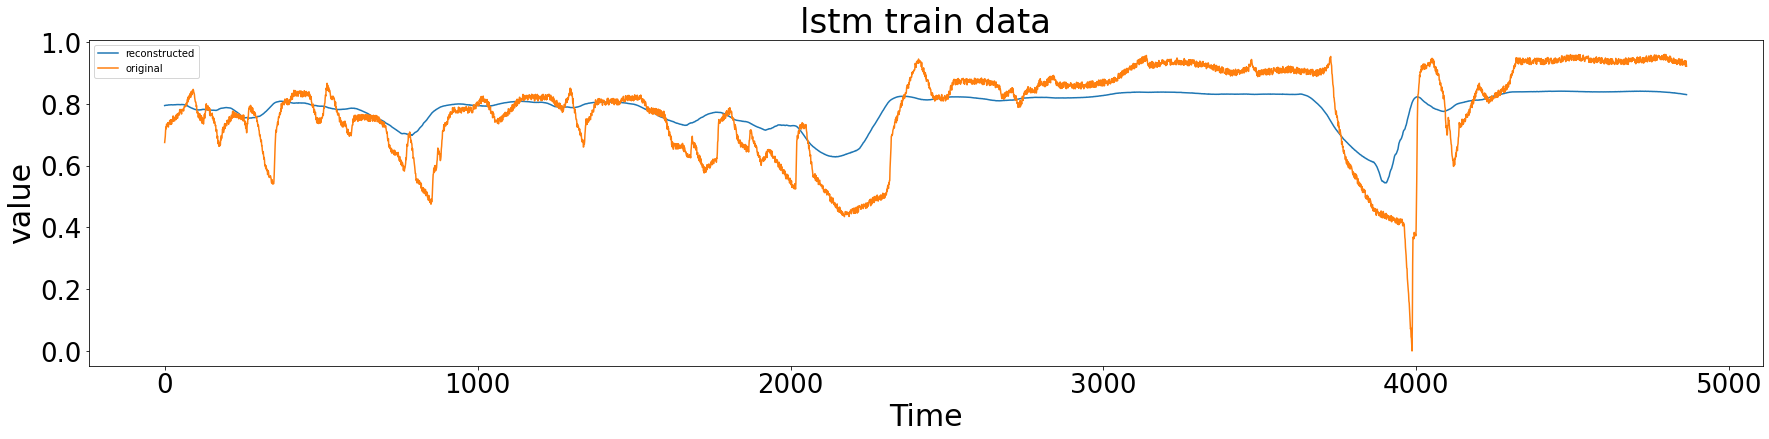

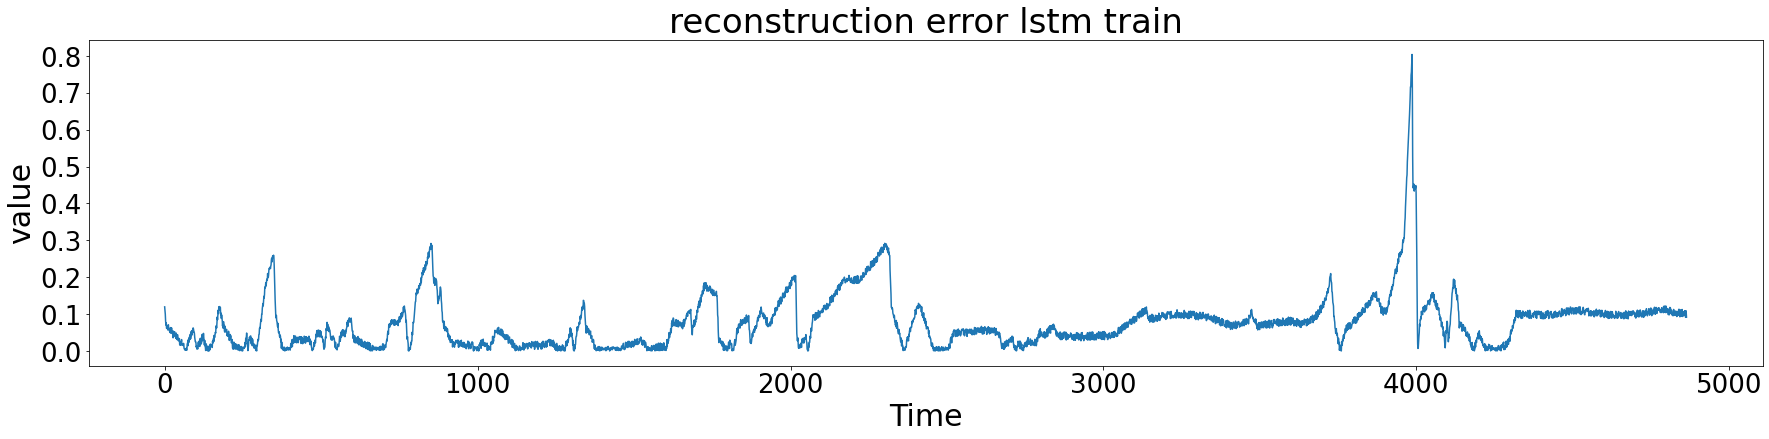

Mean:  0.07672099069169529
Std:  0.07162471304256167
Max:  0.8040692806243896
Min:  1.203550330619585e-06


In [17]:
print(lstm_train.head())
plot(lstm_train, "lstm train data")
error = plot_error(lstm_train, 'reconstruction error lstm train')
count_statistics(error)

   reconstructed   timestamp    signal
0       0.829503  1387518900  0.872812
1       0.829457  1387519200  0.878082
2       0.829515  1387519500  0.879614
3       0.829576  1387519800  0.870780
4       0.830039  1387520100  0.880160


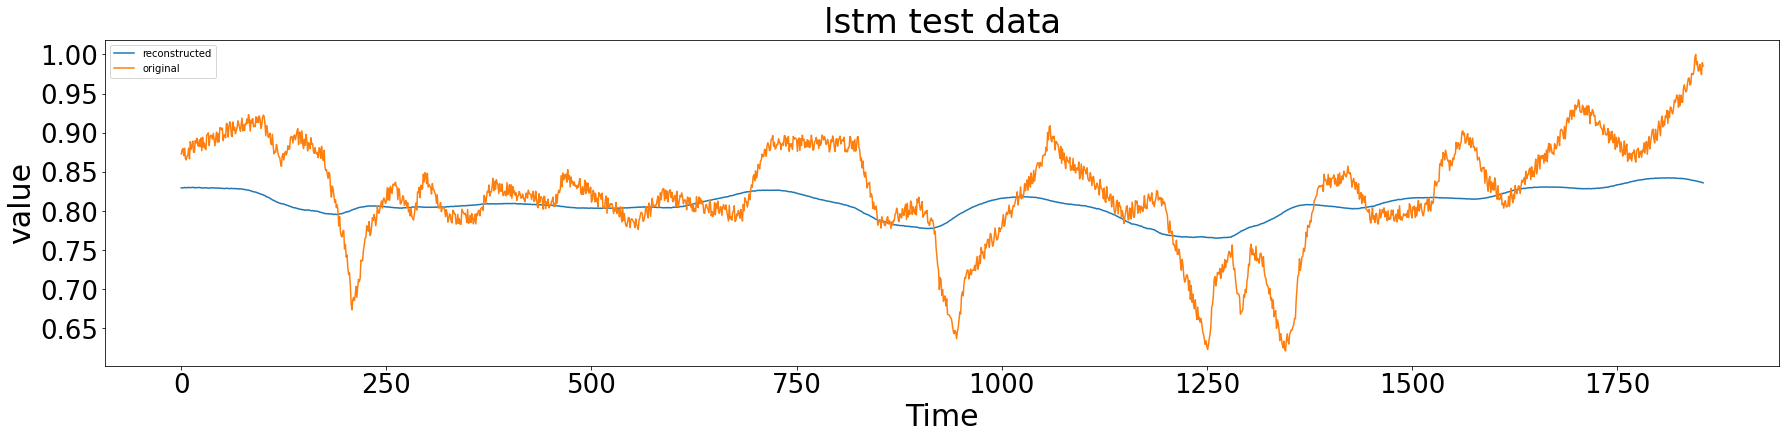

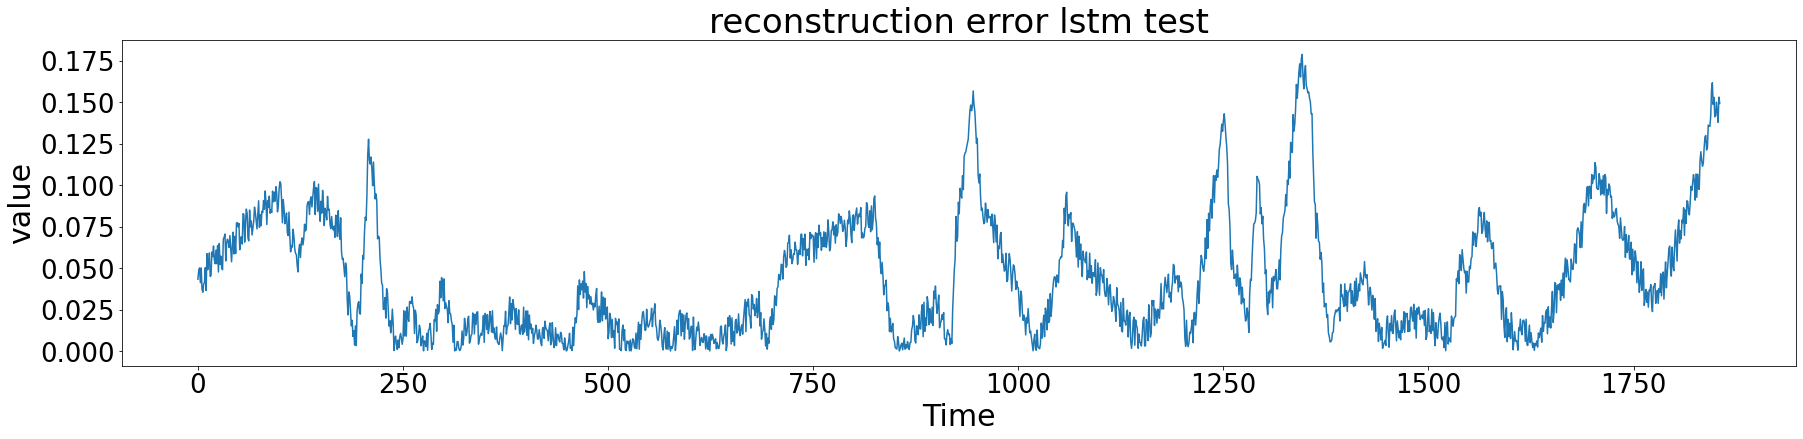

Mean:  0.04421574037749209
Std:  0.03568318853702745
Max:  0.178735998260515
Min:  7.705650993572455e-05


In [18]:
print(lstm_test.head())
plot(lstm_test, "lstm test data")
error = plot_error(lstm_test, 'reconstruction error lstm test')
count_statistics(error)

   reconstructed   timestamp    signal
0       0.615941  1386018900  0.675424
1       0.584978  1386019200  0.684525
2       0.558724  1386019500  0.695691
3       0.588130  1386019800  0.714638
4       0.566211  1386020100  0.725812


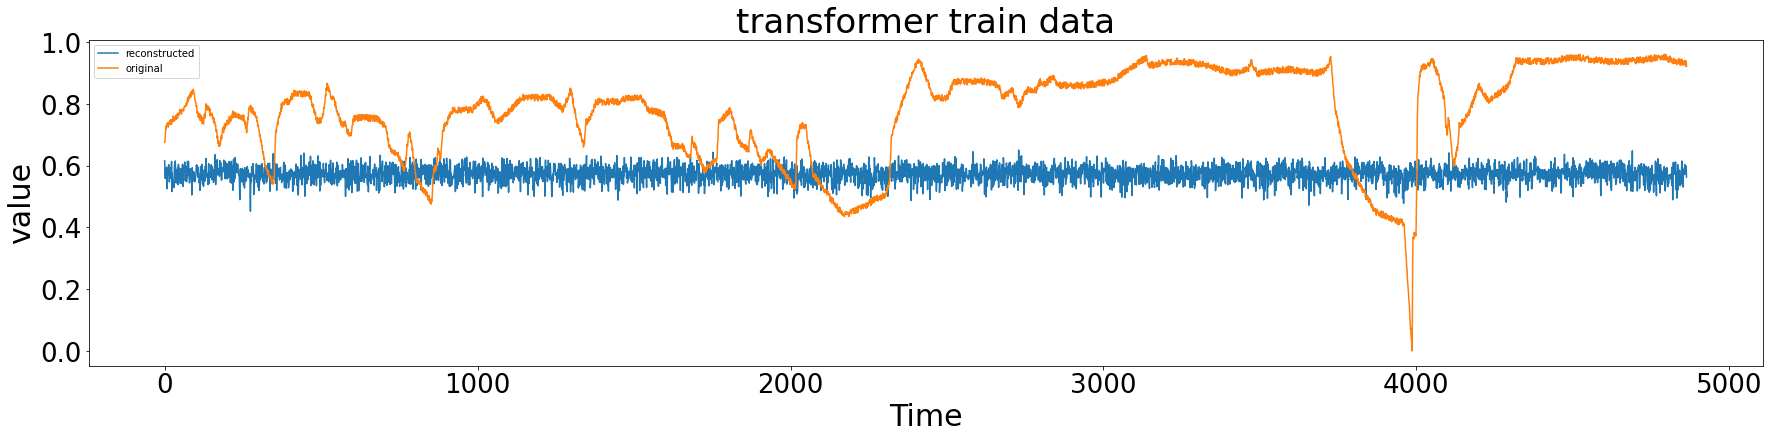

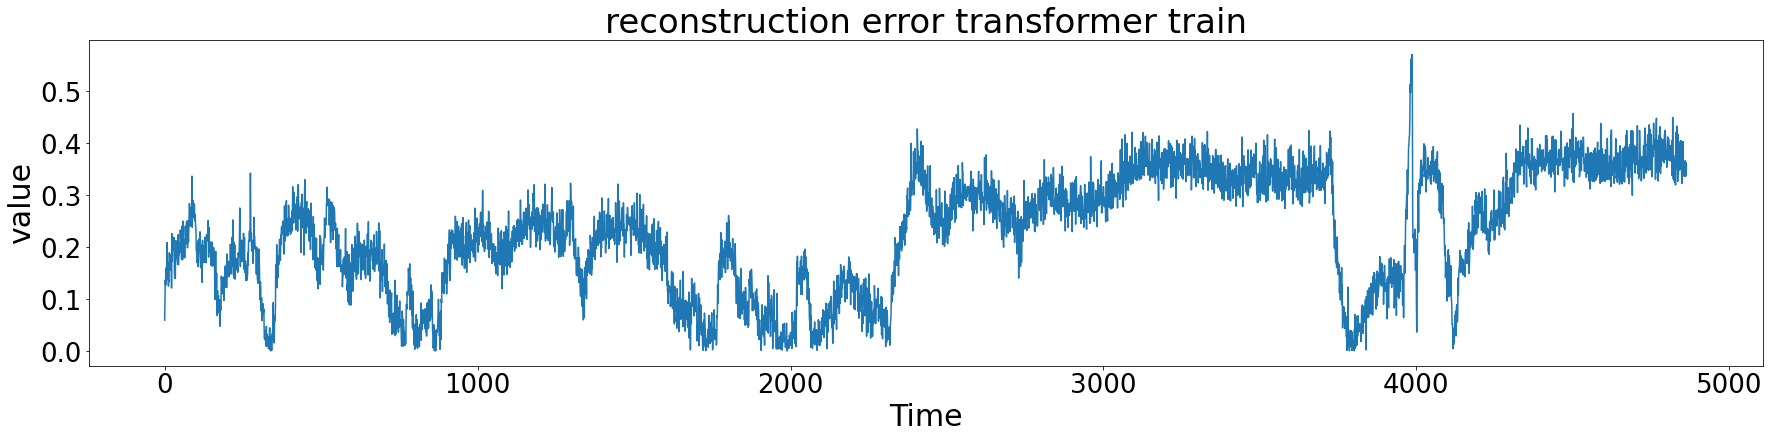

Mean:  0.22927854568365122
Std:  0.1102896306375098
Max:  0.570909321308136
Min:  0.00015962858870610663


In [19]:
print(transformer_train.head())
plot(transformer_train, "transformer train data")
error = plot_error(transformer_train, 'reconstruction error transformer train')
count_statistics(error)

   reconstructed   timestamp    signal
0       0.553039  1387518900  0.872812
1       0.590580  1387519200  0.878082
2       0.601887  1387519500  0.879614
3       0.559987  1387519800  0.870780
4       0.578781  1387520100  0.880160


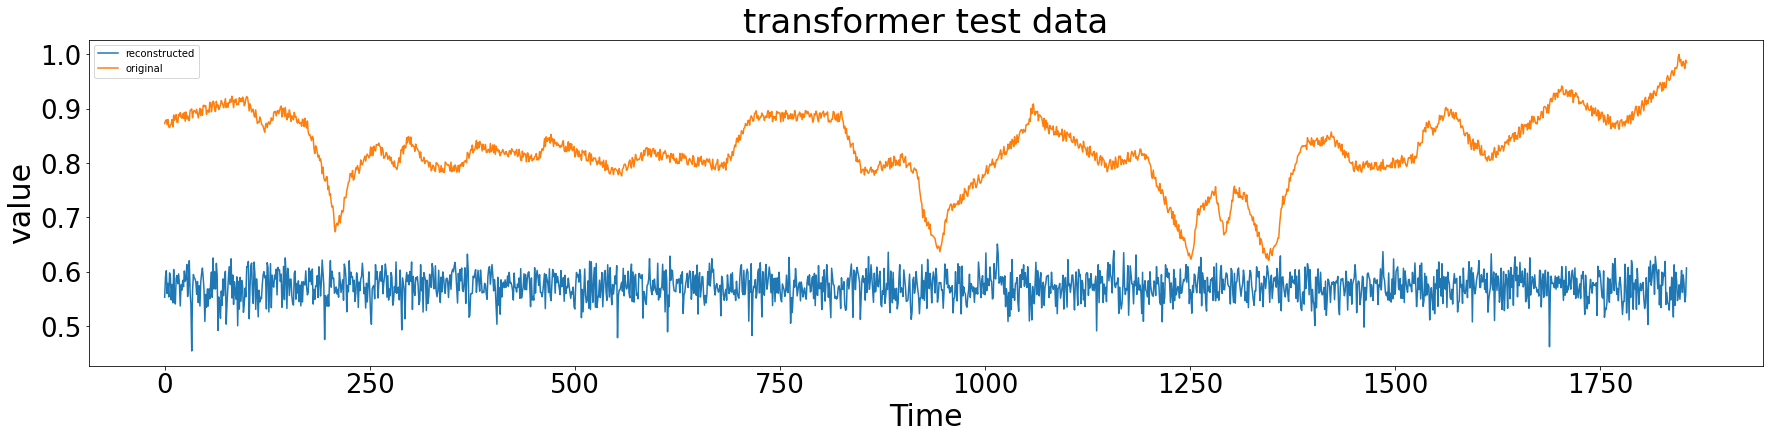

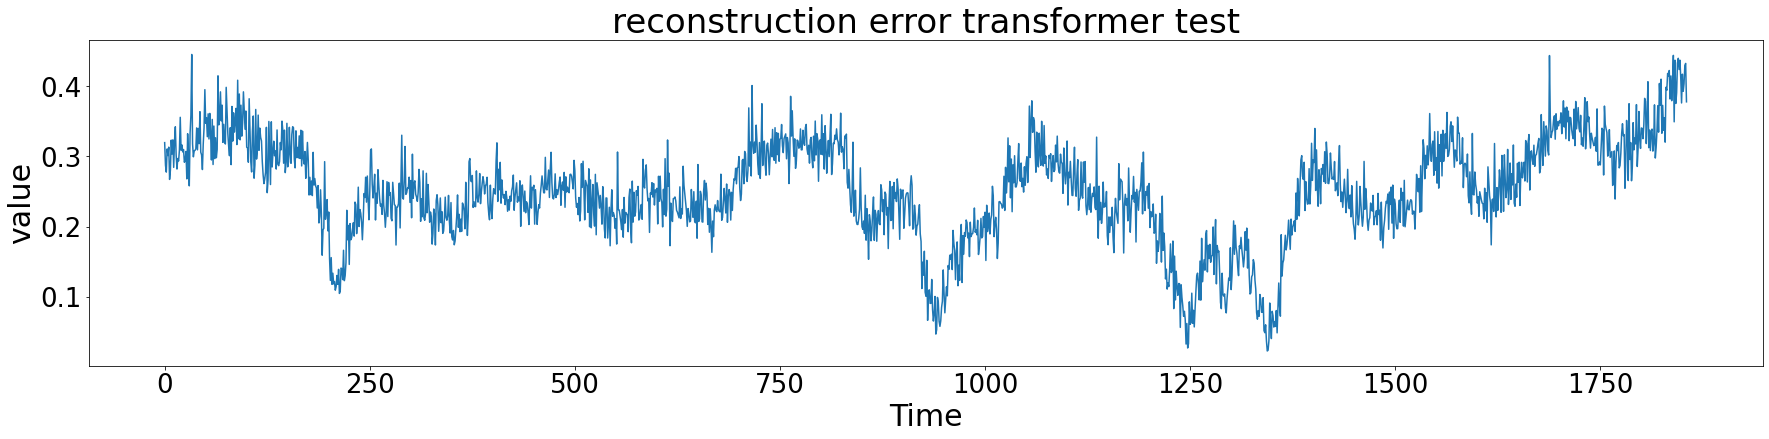

Mean:  0.25037930499068645
Std:  0.07118488399518938
Max:  0.4455491716747464
Min:  0.022568826506608075


In [20]:
print(transformer_test.head())
plot(transformer_test, "transformer test data")
error = plot_error(transformer_test, 'reconstruction error transformer test')
count_statistics(error)